# Uber Data Analysis Project

In [3]:
import pandas
import seaborn


# Load CSV file into memory

In [5]:
data = pandas.read_csv('uberdata.csv')

In [6]:
data.tail()



,Date/Time,Lat,Lon,Base
57011,04-05-2014 06:49,40.6830,-74.0009,B02598
57012,04-05-2014 06:51,40.7160,-73.9871,B02598
57013,04-05-2014 06:52,40.7762,-73.9801,B02598
57014,04-05-2014 06:52,40.7928,-73.9692,B02598
57015,04-05-2014 06:00,NaN,NaN,NaN


In [7]:
dt = '4/30/2014 23:22:00'
print(dt)
d,t = dt.split()
print(d,t,sep='\n')
month,date,year = d.split('/')
print(date,month,year,sep='\n')

4/30/2014 23:22:00
4/30/2014
23:22:00
30
4
2014


# Convert datetime and add some useful columns

In [8]:
date_time = '4/30/2014 23:22:00'

In [9]:
date_time= pandas.to_datetime(date_time)

In [10]:
data['Date/Time'] = data['Date/Time'].map(pandas.to_datetime)

In [11]:
data.tail()

,Date/Time,Lat,Lon,Base
57011,2014-04-05 06:49:00,40.6830,-74.0009,B02598
57012,2014-04-05 06:51:00,40.7160,-73.9871,B02598
57013,2014-04-05 06:52:00,40.7762,-73.9801,B02598
57014,2014-04-05 06:52:00,40.7928,-73.9692,B02598
57015,2014-04-05 06:00:00,NaN,NaN,NaN


In [12]:
def get_dom(date_time):
    return date_time.day

data['dom']=data['Date/Time'].map(get_dom)

In [13]:
data.tail()

,Date/Time,Lat,Lon,Base,dom
57011,2014-04-05 06:49:00,40.6830,-74.0009,B02598,5
57012,2014-04-05 06:51:00,40.7160,-73.9871,B02598,5
57013,2014-04-05 06:52:00,40.7762,-73.9801,B02598,5
57014,2014-04-05 06:52:00,40.7928,-73.9692,B02598,5
57015,2014-04-05 06:00:00,NaN,NaN,NaN,5


In [14]:
def get_weekday(date_time):
    return date_time.weekday()
data['Weekday'] = data['Date/Time'].map(get_weekday)

def get_hour(date_time):
    return date_time.hour

data['Hour'] = data['Date/Time'].map(get_hour)


In [15]:
data.tail()

,Date/Time,Lat,Lon,Base,dom,Weekday,Hour
57011,2014-04-05 06:49:00,40.6830,-74.0009,B02598,5,5,6
57012,2014-04-05 06:51:00,40.7160,-73.9871,B02598,5,5,6
57013,2014-04-05 06:52:00,40.7762,-73.9801,B02598,5,5,6
57014,2014-04-05 06:52:00,40.7928,-73.9692,B02598,5,5,6
57015,2014-04-05 06:00:00,NaN,NaN,NaN,5,5,6


# Analysis

# Datewise Analysis

In [21]:
import matplotlib.pyplot as plt
plt.hist(data.dom,bins=30,width=.6,range=(.7,30.9))
xticks(range(1,31), data.dom.index)
plt.xlabel('Date of Month')
plt.ylabel ('Frequency')
plt.title ('Frequency by date of month -- uber -- Apr 2014')

NameError: name 'xticks' is not defined

In [22]:
def count_rows(rows):
    return len(rows)

by_date = data.groupby('dom').apply(count_rows)
by_date

dom
1     4749
2     5862
3     6981
4     8978
5     1875
6      820
7     1376
8     1023
9     1167
10    1274
11    1362
12    1087
13     783
14     854
15    1391
16    1059
17    1343
18     953
19     851
20     615
21     744
22     959
23    1196
24    1394
25    1410
26    1418
27     848
28     971
29    1487
30    2186
dtype: int64

In [23]:
plot(by_date)

NameError: name 'plot' is not defined

In [24]:
by_date_sorted=(by_date.sort_values())
by_date_sorted

dom
20     615
21     744
13     783
6      820
27     848
19     851
14     854
18     953
22     959
28     971
8     1023
16    1059
12    1087
9     1167
23    1196
10    1274
17    1343
11    1362
7     1376
15    1391
24    1394
25    1410
26    1418
29    1487
5     1875
30    2186
1     4749
2     5862
3     6981
4     8978
dtype: int64

<BarContainer object of 30 artists>

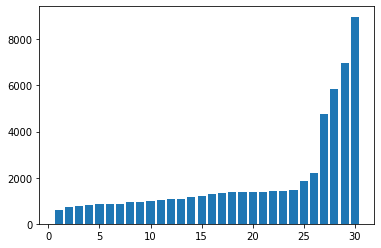

In [27]:
plt.bar(range(1,31),by_date_sorted)

#xticks(range(1,31), by_date_sorted.index)

# Analysis according to hour

Text(0, 0.5, 'Frequency')

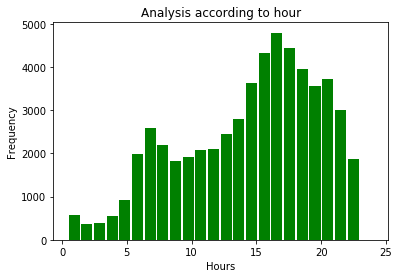

In [28]:
plt.hist(data.Hour,bins=24,range=(.5,24),width=.85 , color='g')
plt.title('Analysis according to hour')
plt.xlabel('Hours')
plt.ylabel('Frequency')

# Analysis according to weekday

(array([ 3945.,  9609., 11470., 10992., 12703.,  5231.,  3066.]),
 array([0.        , 0.85714286, 1.71428571, 2.57142857, 3.42857143,
        4.28571429, 5.14285714, 6.        ]),
 <a list of 7 Patch objects>)

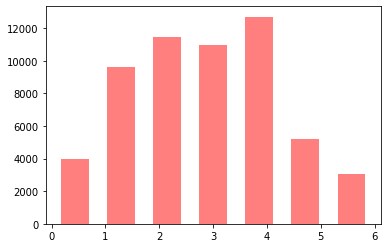

In [30]:
plt.hist(data.Weekday,bins=7,range=(0,6),rwidth=.6,color='r',alpha=.5)

#xticks(range(7), 'Mon Tue Wed Thu Fri Sat Sun'.split())


# Cross Analysis (hour,weekday)

In [31]:
cross = data.groupby('Weekday Hour'.split()).apply(count_rows).unstack()

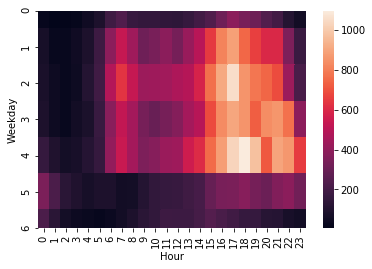

In [32]:
seaborn.heatmap(cross)

In [33]:
hist(data['Weekday'],bins=7,range=(0,6),rwidth=.6,color='green')

twiny()
hist(data['Hour'],bins=24,range=(0.5,24),rwidth=.6,color='red',alpha=.5)
;

NameError: name 'hist' is not defined

# Analysis by latitude and longitude

''

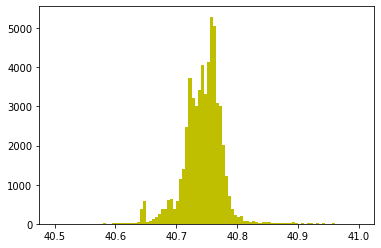

In [34]:
plt.hist(data['Lat'],bins=100,range=(40.5,41),color='y')
;

In [35]:
hist(data['Lon'],bins=100,range=(-74.1,-73.9),color='orange')
;

NameError: name 'hist' is not defined

In [36]:
hist(data['Lat'],bins=100,range=(40.5,41),color='violet',label='Latitude')
legend(loc='upper left')
twiny()
hist(data['Lon'],bins=100,range=(-74.1,-73.9),color='orange',alpha=.5,label='Longitude')
grid()
legend(loc='upper right')

NameError: name 'hist' is not defined

(0, 100)

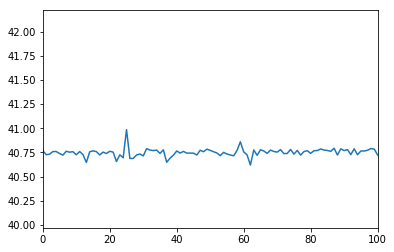

In [27]:
plot(data['Lat'])
xlim(0,100)

# Plotting Linear Regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   #Data visualisation libraries 
import seaborn as sns
%matplotlib inline

In [3]:
uber_data = pd.read_csv('Desktop/uber-raw-data-apr14.csv')
uber_data.head()
uber_data.info()
uber_data.describe()
uber_data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
Date/Time    564516 non-null object
Lat          564516 non-null float64
Lon          564516 non-null float64
Base         564516 non-null object
dtypes: float64(2), object(2)
memory usage: 17.2+ MB


Index(['Date/Time', 'Lat', 'Lon', 'Base'], dtype='object')

In [4]:
x=[(i) for i in uber_data['Lat']]
y=[(j) for j in uber_data['Lon']]

In [6]:
fit = np.polyfit(x,y,1)
fit_fn = np.poly1d(fit) 

In [10]:
import matplotlib

Text(0.5,1,'Longitude vs Latitude Regression model')

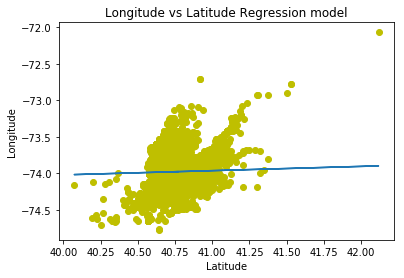

In [20]:
plt.plot(x,y, 'yo', x, fit_fn(x))
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Longitude vs Latitude Regression model')